# X90 Optimiser

This notebook is purely for the purpose of optimising the X90 pulse for a given transmon

In [1]:
# imports
import numpy as np
from qutip import basis
from transmon_code.transmon import *
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *

In [8]:
# define the transmon

tr = Transmon(n_levels=8, initial_state=0, Ω=5000, α=-100, RWA=False, dt=1/10000)
tr.X90_args = {'A': 7.40010644655478, 'Γ': 0.5, 'ω': tr.Ω, 'A_DRAG': 0}

Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


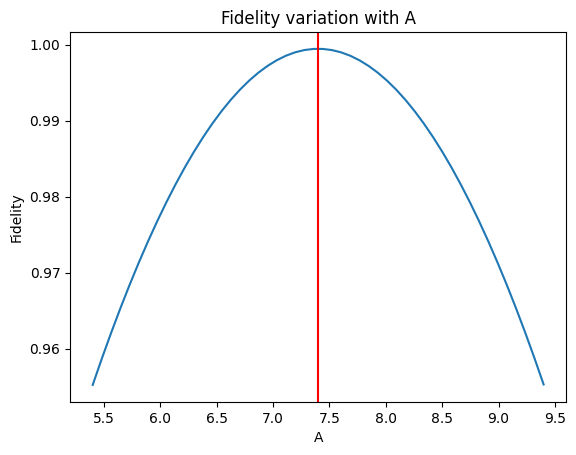

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
No optimum found for A_DRAG, optimal value set to upper end of test values at 0.1. Rerun with altered semiranges.


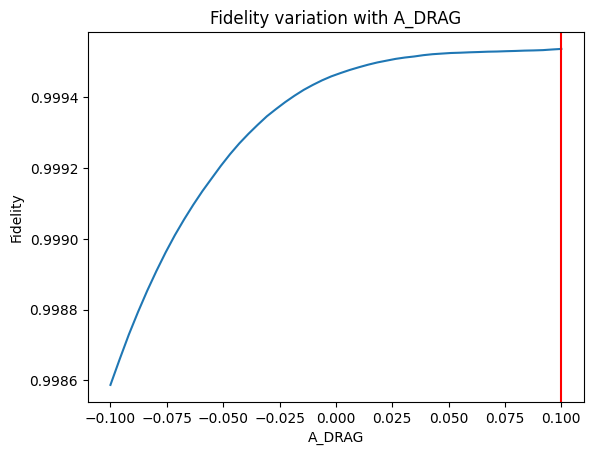

Optimal args:{'A': 7.399697017851243, 'Γ': 0.5, 'ω': 4997.927236191128, 'A_DRAG': 0.1}


In [9]:
# optimise the pulse

t = np.arange(0, 1, tr.dt)
semiranges = {"A":0.5, "Γ":0, "A_DRAG":0.1}

tr.X90_args = create_X90_pulse(t, tr, args=tr.X90_args, semiranges=semiranges, plot=True, rand_init=False, N=50)

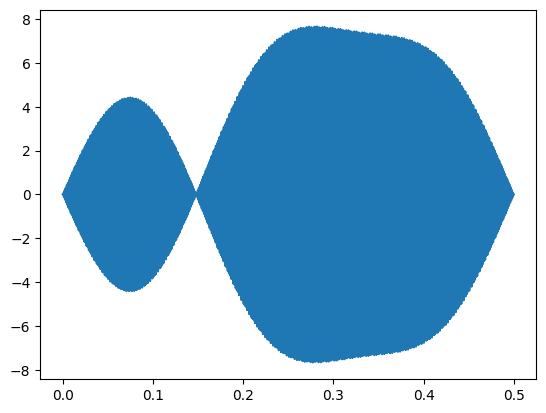

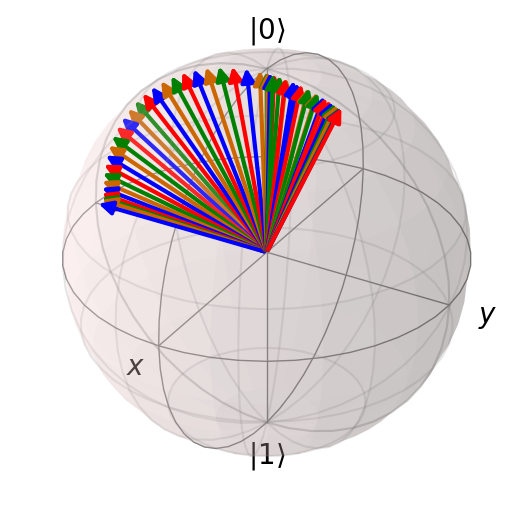

Fidelity:                    0.9995372981622095
Total measured error:        0.00046270183779051344
Leakage error:               0.000207194265166821
Theoretical coherence error: 0.0
Error accounted for:         0.000207194265166821
Error unaccounted for:       0.0002555075726236925


In [10]:
# check result

# test from 0 to - (minus)
targ = (basis(tr.n_levels, 0)-1j*basis(tr.n_levels, 1)).unit()

res, f = simulate(tr, tr.X90_args, target=targ, noise=False, plot=True)

break_down_errors(tr, tr.X90_args, res[-1], f)